In [1]:
### Load libraries -------
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numba
import math
from datetime import datetime
import numpy as np
import seaborn as sns
from dtaidistance import dtw, clustering
from dtaidistance import dtw_visualisation as dtwvis
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

# Pandas parameters
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 500)

In [2]:
### Define out paths ------

# check if out path exists, if it does not exists add the path
if not os.path.exists('/Users/hannahfrank/desktop/conflict_escalation_out'):
    os.makedirs('/Users/hannahfrank/desktop/conflict_escalation_out')

# add subfolders for the out path
out_paths = {
    "desciptive_plots_outcome": '/Users/hannahfrank/desktop/conflict_escalation_out/plots',
    "data": '/Users/hannahfrank/desktop/conflict_escalation_out/data'
}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)
        
out_paths["data"]

'/Users/hannahfrank/desktop/conflict_escalation_out/data'

In [3]:
### Load data -------
ucdp = pd.read_csv(os.path.join(out_paths["data"], 
                                "ucdp.csv"))
ucdp.head(3)

,year_month,country_id,best,high,low,year,country
0,1989-01,700,691,1122,684,1989,Afghanistan
1,1989-02,700,160,160,41,1989,Afghanistan
2,1989-03,700,1744,6045,516,1989,Afghanistan


In [4]:
### Import time series -----
ts_dict = open("ucdp_time_series.pkl", "rb")
ts_ucdp = pickle.load(ts_dict)
ts_ucdp['Afghanistan, 1997']

array([  69,  182,  243,  191, 1553,  605,  177,  210,  383,  425,   58,
         98])

In [5]:
### Load matrix --------
ds_df = pd.read_csv(os.path.join(out_paths["data"], 
                                 "ucdp_dtw_matrix.csv"), index_col = [0])
ds_df.loc[["Afghanistan, 2019"]]

,"Afghanistan, 1989","Afghanistan, 1990","Afghanistan, 1991","Afghanistan, 1992","Afghanistan, 1993","Afghanistan, 1994","Afghanistan, 1995","Afghanistan, 1996","Afghanistan, 1997","Afghanistan, 1998",...,"Yemen (North Yemen), 2010","Yemen (North Yemen), 2011","Yemen (North Yemen), 2012","Yemen (North Yemen), 2013","Yemen (North Yemen), 2014","Yemen (North Yemen), 2015","Yemen (North Yemen), 2016","Yemen (North Yemen), 2017","Yemen (North Yemen), 2018","Yemen (North Yemen), 2019"
"Afghanistan, 2019",5658.292145,8188.951764,8163.549596,5595.295345,7126.779778,6454.196774,6673.046456,7770.34877,6091.977676,5091.314172,...,8620.207596,8323.667401,7930.132281,8510.821641,8153.284737,6422.971509,7900.114746,8028.794928,7345.734068,8219.048668


### Principal Component Analysis

In [6]:
### PCA on cost matrix -------
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
x_data = StandardScaler().fit_transform(ds_df)
pca_c = PCA(n_components=5)
pca_out = pca_c.fit_transform(x_data)

df_pca = pd.DataFrame(data = pca_out, 
                      columns = ['pc_1', 
                                 'pc_2',
                                 'pc_3',
                                 'pc_4',
                                 'pc_5'],
                      index=ds_df.index.copy())
df_pca.head(3)

,pc_1,pc_2,pc_3,pc_4,pc_5
"Afghanistan, 1989",94.187688,-26.927064,-3.932140,-5.562747,2.452174
"Afghanistan, 1990",18.679279,-14.363932,3.094849,0.298012,2.587745
"Afghanistan, 1991",16.408488,-12.502990,4.570672,1.570744,-0.910040


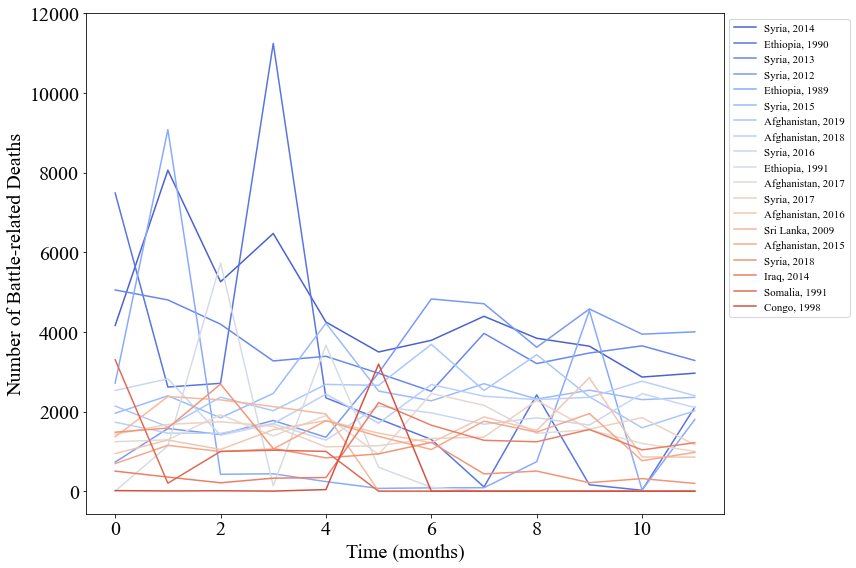

In [7]:
### PC 1 -------
pc1 = df_pca.sort_values("pc_1", 
                   key=abs, 
                   ascending=False)[:20].index

pc1_subset = {key: ts_ucdp[key] for key in pc1}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc1, range(0,19)): 
    ax.plot(pc1_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_01"), 
                         dpi=200)     

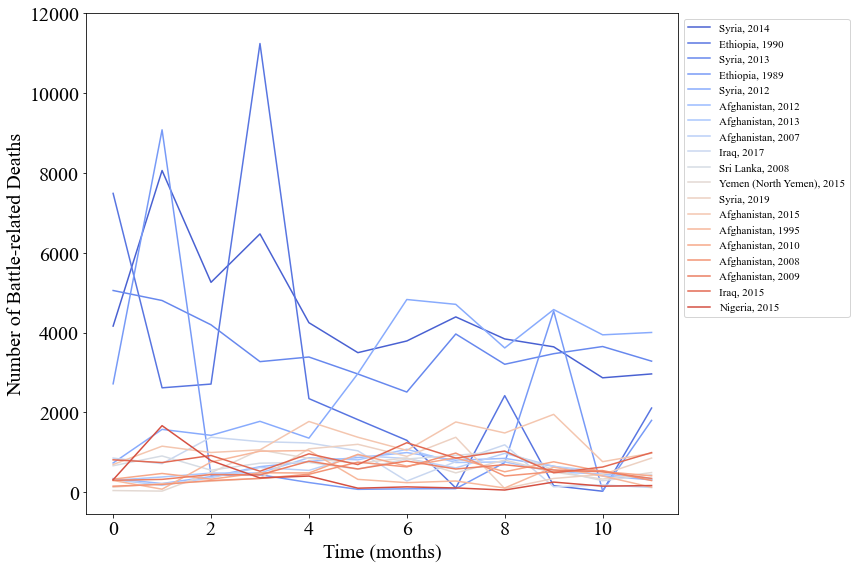

In [8]:
### PC 2 -------
pc2 = df_pca.sort_values("pc_2", 
                   key=abs, 
                   ascending=False)[:20].index

pc2_subset = {key: ts_ucdp[key] for key in pc2}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc2, range(0,19)): 
    ax.plot(pc2_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
         'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_02"), 
                         dpi=200)     

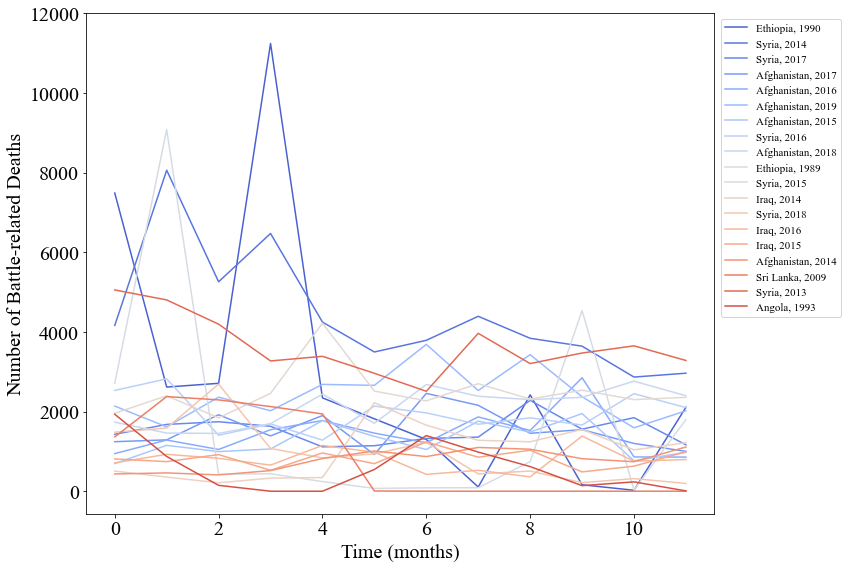

In [9]:
### PC 3 -------
pc3 = df_pca.sort_values("pc_3", 
                   key=abs, 
                   ascending=False)[:20].index

pc3_subset = {key: ts_ucdp[key] for key in pc3}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc3, range(0,19)): 
    ax.plot(pc3_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1.21, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_03"), 
                         dpi=200)     

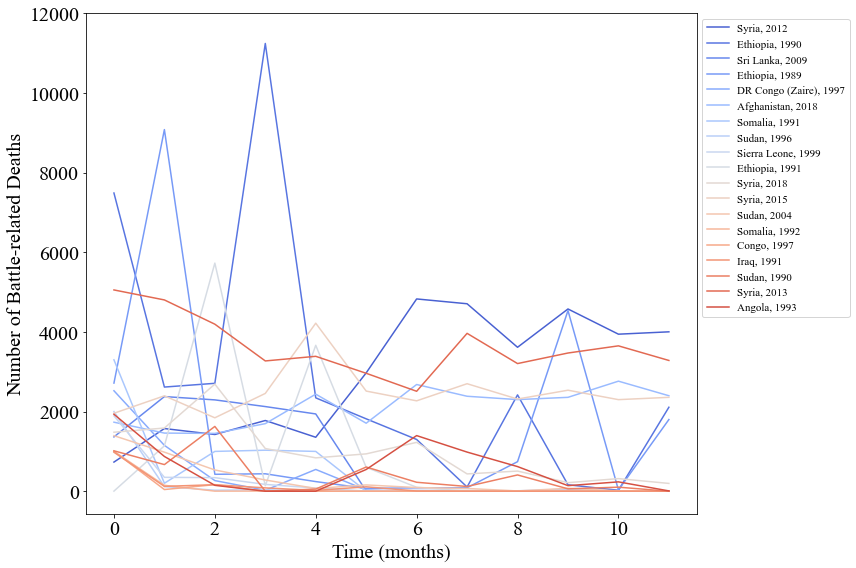

In [10]:
### PC 4 -------
pc4 = df_pca.sort_values("pc_4", 
                   key=abs, 
                   ascending=False)[:20].index

pc4_subset = {key: ts_ucdp[key] for key in pc4}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc4, range(0,19)): 
    ax.plot(pc4_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_04"), 
                         dpi=200)     

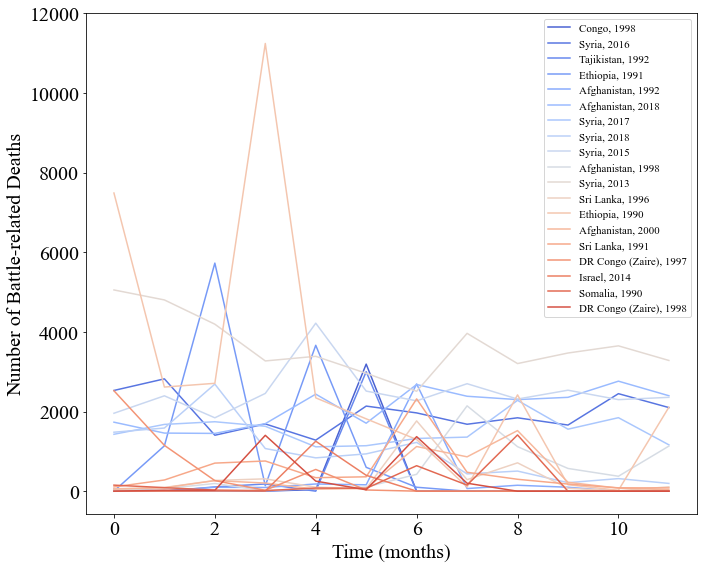

In [11]:
### PC 5 -------
pc5 = df_pca.sort_values("pc_5", 
                   key=abs, 
                   ascending=False)[:20].index

pc5_subset = {key: ts_ucdp[key] for key in pc5}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=20)
ax = plt.axes()
                    
for c,i in zip(pc5, range(0,19)): 
    ax.plot(pc5_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        14000, 
                        2000))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_05"), 
                         dpi=200)     

In [12]:
### Make lists with time seires to extract -----
keys_to_extract = []

for i in range(0, len(pc1)):
    keys_to_extract.append(pc1[i])
keys_to_extract

['Syria, 2014',
 'Ethiopia, 1990',
 'Syria, 2013',
 'Syria, 2012',
 'Ethiopia, 1989',
 'Syria, 2015',
 'Afghanistan, 2019',
 'Afghanistan, 2018',
 'Syria, 2016',
 'Ethiopia, 1991',
 'Afghanistan, 2017',
 'Syria, 2017',
 'Afghanistan, 2016',
 'Sri Lanka, 2009',
 'Afghanistan, 2015',
 'Syria, 2018',
 'Iraq, 2014',
 'Somalia, 1991',
 'Congo, 1998',
 'Tajikistan, 1992']

In [13]:
### Extract time series from dictionary -------
a_subset = {key: ts_ucdp[key] for key in keys_to_extract}
a_subset = list(a_subset.values())

In [14]:
### Hirachical tree clustering ------
# https://dtaidistance.readthedocs.io/en/latest/usage/clustering.html
cluster_tree = clustering.HierarchicalTree(dists_fun=dtw.distance_matrix, 
                                           dists_options={})

cluster_tree_id = cluster_tree.fit(a_subset)

  0%|          | 0/20 [00:00<?, ?it/s]

 95%|█████████▌| 19/20 [00:00<00:00, 3245.44it/s]


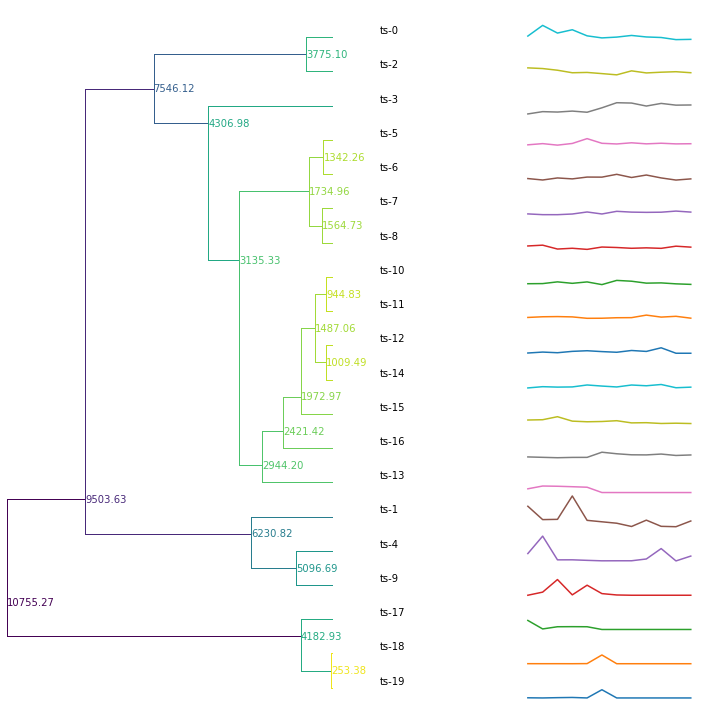

In [15]:
### Make plot ------
# https://dtaidistance.readthedocs.io/en/stable/usage/clustering.html
fig, ax = plt.subplots(nrows=1, 
                       ncols=2, 
                       figsize=(10, 10))

labs = lambda idx: "ts-" + str(idx)

cluster_tree.plot(axes=ax, 
                  show_ts_label=labs,
                  show_tr_label=True, 
                  ts_label_margin=-10,
                  ts_left_margin=10, 
                  ts_sample_length=1)

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_01_tree"), 
                         dpi=200) 

### Cluster on subset data 

In [16]:
### Get data for one year only -----
test_year = 2016
ts_key = [key for key, value in ts_ucdp.items() if f'{test_year}' in key.lower()]
ts_val = [value for key, value in ts_ucdp.items() if f'{test_year}' in key.lower()]
ts = dict(zip(ts_key, ts_val))

In [17]:
### Calculate cost matrix ------
# https://dtaidistance.readthedocs.io/en/latest/modules/dtw.html
ds_s = dtw.distance_matrix(list(ts.values()))
ds_s

array([[0.00000000e+00, 5.28714233e+03, 5.30896675e+03, ...,
        5.31122481e+03, 5.31122481e+03, 4.49852598e+03],
       [5.28714233e+03, 0.00000000e+00, 3.16227766e+01, ...,
        3.76430604e+01, 3.76430604e+01, 8.78916378e+02],
       [5.30896675e+03, 3.16227766e+01, 0.00000000e+00, ...,
        4.58257569e+00, 4.58257569e+00, 8.95642786e+02],
       ...,
       [5.31122481e+03, 3.76430604e+01, 4.58257569e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.98216566e+02],
       [5.31122481e+03, 3.76430604e+01, 4.58257569e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.98216566e+02],
       [4.49852598e+03, 8.78916378e+02, 8.95642786e+02, ...,
        8.98216566e+02, 8.98216566e+02, 0.00000000e+00]])

In [18]:
### Transfer cost matrix into df -----
ds_df_s = pd.DataFrame(ds_s,
                 columns=list(ts.keys()),
                 index=list(ts.keys()))
ds_df_s

,"Afghanistan, 2016","Algeria, 2016","Angola, 2016","Australia, 2016","Bangladesh, 2016","Bhutan, 2016","Burkina Faso, 2016","Burundi, 2016","Cambodia (Kampuchea), 2016","Cameroon, 2016",...,"Sudan, 2016","Syria, 2016","Tajikistan, 2016","Thailand, 2016","Tunisia, 2016","Turkey, 2016","Uganda, 2016","United Arab Emirates, 2016","Uzbekistan, 2016","Yemen (North Yemen), 2016"
"Afghanistan, 2016",0.000000,5287.142328,5308.966754,5311.224812,5301.971897,5311.224812,5311.224812,5309.685866,5311.224812,5262.061763,...,5011.122928,2906.874438,5311.224812,5296.383389,5298.745040,4802.335994,5311.224812,5311.224812,5311.224812,4498.525981
"Algeria, 2016",5287.142328,0.000000,31.622777,37.643060,22.427661,37.643060,37.643060,29.189039,37.643060,42.766810,...,442.273671,6956.822910,37.643060,16.309506,71.993055,449.370671,37.643060,37.643060,37.643060,878.916378
"Angola, 2016",5308.966754,31.622777,0.000000,4.582576,23.452079,4.582576,4.582576,2.449490,4.582576,63.835727,...,468.289440,6975.969395,4.582576,11.958261,69.036222,492.073165,4.582576,4.582576,4.582576,895.642786
"Australia, 2016",5311.224812,37.643060,4.582576,0.000000,24.799194,0.000000,0.000000,4.582576,0.000000,67.756918,...,470.928869,6978.338484,0.000000,18.601075,69.036222,495.919348,0.000000,0.000000,0.000000,898.216566
"Bangladesh, 2016",5301.971897,22.427661,23.452079,24.799194,0.000000,24.799194,24.799194,21.771541,24.799194,29.325757,...,423.695645,6965.256420,24.799194,22.271057,49.193496,445.572665,24.799194,24.799194,24.799194,890.004494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Turkey, 2016",4802.335994,449.370671,492.073165,495.919348,445.572665,495.919348,495.919348,489.214677,495.919348,398.252433,...,292.567941,6598.637435,495.919348,471.632272,343.074336,0.000000,495.919348,495.919348,495.919348,389.069403
"Uganda, 2016",5311.224812,37.643060,4.582576,0.000000,24.799194,0.000000,0.000000,4.582576,0.000000,67.756918,...,470.928869,6978.338484,0.000000,18.601075,69.036222,495.919348,0.000000,0.000000,0.000000,898.216566
"United Arab Emirates, 2016",5311.224812,37.643060,4.582576,0.000000,24.799194,0.000000,0.000000,4.582576,0.000000,67.756918,...,470.928869,6978.338484,0.000000,18.601075,69.036222,495.919348,0.000000,0.000000,0.000000,898.216566
"Uzbekistan, 2016",5311.224812,37.643060,4.582576,0.000000,24.799194,0.000000,0.000000,4.582576,0.000000,67.756918,...,470.928869,6978.338484,0.000000,18.601075,69.036222,495.919348,0.000000,0.000000,0.000000,898.216566


In [19]:
### PCA on cost matrix -------
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
x_data = StandardScaler().fit_transform(ds_df_s)
pca_c = PCA(n_components=3)
pca_out = pca_c.fit_transform(x_data)

df_pca = pd.DataFrame(data = pca_out, 
                      columns = ['pc_1', 
                                 'pc_2',
                                 'pc_3'],
                      index=ds_df_s.index.copy())
df_pca.head(3)

,pc_1,pc_2,pc_3
"Afghanistan, 2016",37.356060,1.634784,1.526126
"Algeria, 2016",-2.028904,-0.263426,0.088341
"Angola, 2016",-2.106556,-0.389412,0.201641


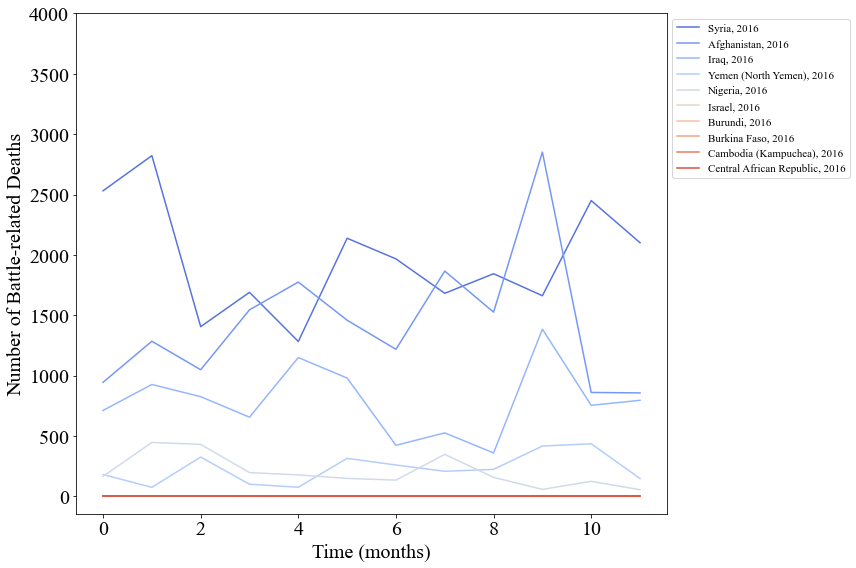

In [20]:
### PC 1 -------
pc1 = df_pca.sort_values("pc_1", 
                   key=abs, 
                   ascending=False)[:10].index

pc1_subset = {key: ts_ucdp[key] for key in pc1}

fig = plt.figure(figsize=(12, 8))
col = sns.color_palette("coolwarm", n_colors=10)
ax = plt.axes()
                    
for c,i in zip(pc1, range(0,19)): 
    ax.plot(pc1_subset[c],
            c=col[i],
            label=c)
    
# Labels
ax.set_ylabel('Number of Battle-related Deaths', 
                fontsize = 20, 
                fontname='Times New Roman')

ax.set_xlabel('Time (months)', 
                fontsize = 20, 
                fontname='Times New Roman')

# Ticks
ax.tick_params(axis='x',
               labelsize=20)

ax.set_yticks(np.arange(0, 
                        4500, 
                        500))

ax.tick_params(axis='y', 
               labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.legend(bbox_to_anchor=(1, 1),
          prop={'size': 11, 
                'family': 'Times New Roman'})

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_01_short"), 
                         dpi=200)   

In [21]:
### Make lists with time seires to extract -----
keys_to_extract = []

for i in range(0, len(pc1)):
    keys_to_extract.append(pc1[i])
keys_to_extract

['Syria, 2016',
 'Afghanistan, 2016',
 'Iraq, 2016',
 'Yemen (North Yemen), 2016',
 'Nigeria, 2016',
 'Israel, 2016',
 'Burundi, 2016',
 'Burkina Faso, 2016',
 'Cambodia (Kampuchea), 2016',
 'Central African Republic, 2016']

In [22]:
### Extract time series from dictionary -------
a_subset = {key: ts_ucdp[key] for key in keys_to_extract}
a_subset = list(a_subset.values())

 90%|█████████ | 9/10 [00:00<00:00, 2153.13it/s]


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

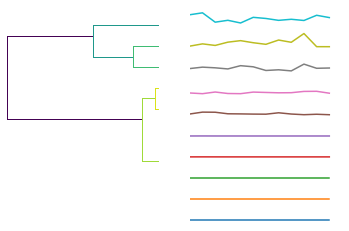

In [23]:
### Hirachical tree clustering ------
# https://dtaidistance.readthedocs.io/en/latest/usage/clustering.html

cluster_tree_sub = clustering.HierarchicalTree(dists_fun=dtw.distance_matrix, 
                                               dists_options={})

cluster_tree_id = cluster_tree_sub.fit(a_subset)

cluster_tree_sub.plot()

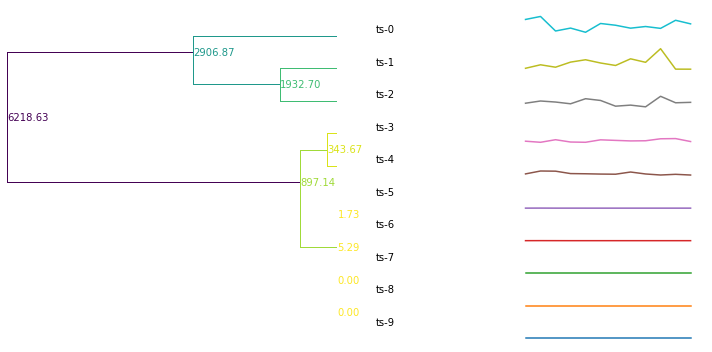

In [24]:
### Make plot ------
# https://dtaidistance.readthedocs.io/en/stable/usage/clustering.html
fig, ax = plt.subplots(nrows=1, 
                       ncols=2, 
                       figsize=(10, 5))

labs = lambda idx: "ts-" + str(idx)

cluster_tree_sub.plot(axes=ax, 
                      show_ts_label=labs,
                      show_tr_label=True, 
                      ts_label_margin=-10,
                      ts_left_margin=10, ts_sample_length=1)

plt.tight_layout()
fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
                         f"_pc_01_tree_sub"), 
                         dpi=200) 